# **Курсовая работа по дисциплине "Машинное обучение"**
### Автор: Бекиров Д.Д.
### Группа: ПМ22-3
### Научный руководитель: Каплевский А.
### Тема: 12. Машинное обучение в задачах распознавания объектов на фотографии

#### **Предисловие**

Цель данной работы - решить задачу распознавания фруктов и овощей на фотографии. Для этого обучим нейронную сеть CNN.\
Датасет содержит фотографии 36 видов овощей и фруктов. Ставится задача мултиклассовой классификации

### Шаг 1: Установка и импортирование библиотек

In [1]:
!pip install tensorflow simple_image_download python-magic-bin==0.4.14 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.metrics import Precision, Recall, Accuracy

from tensorflow.keras.models import load_model

## Считывание Данных

Считаем данные. Данная библиотека сразу преобразует изображение в трехмерный массив (длина, ширина, канал)

In [3]:
train = tf.keras.utils.image_dataset_from_directory('data\\train', label_mode='categorical')
test  = tf.keras.utils.image_dataset_from_directory('data\\test', label_mode='categorical')
validation = tf.keras.utils.image_dataset_from_directory('data\\validation', label_mode='categorical')

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [4]:
labels = os.listdir(os.path.join('data', 'test'))
print(labels)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Выведем несколько изображений данного датасета

In [5]:
data_to_show = train.as_numpy_iterator().next()

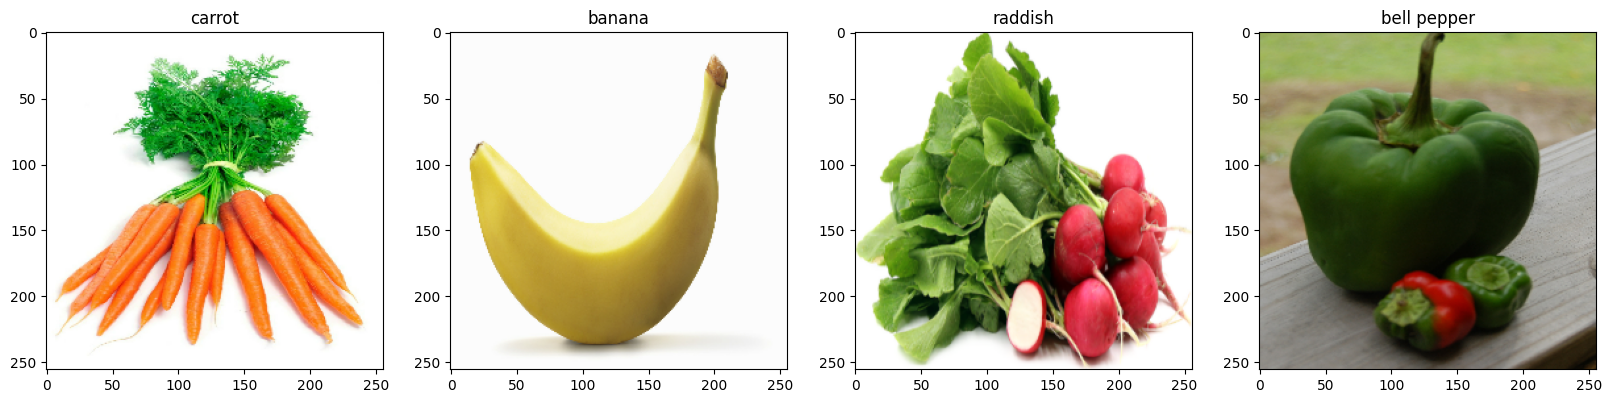

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(data_to_show[0][:4]):
    ax[idx].imshow(img.astype(int))
    temp_label = labels[np.argmax(data_to_show[1][idx])]
    ax[idx].title.set_text(temp_label)

Далее поделим цвет каждого пикселя на 255, чтобы получить значение цвета в диапазоне [0, 1]

In [7]:
train = train.map(lambda x, y: (x/255, y))
test  = test.map(lambda x, y: (x/255, y))
validation = validation.map(lambda x, y: (x/255, y))

## Создание Нейронной Сети

**Слой Conv2D** 

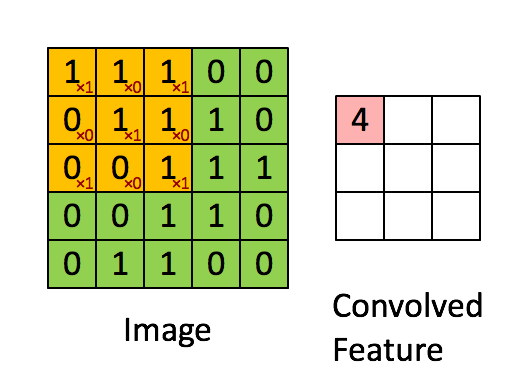 

**Слой MaxPooling2D** 

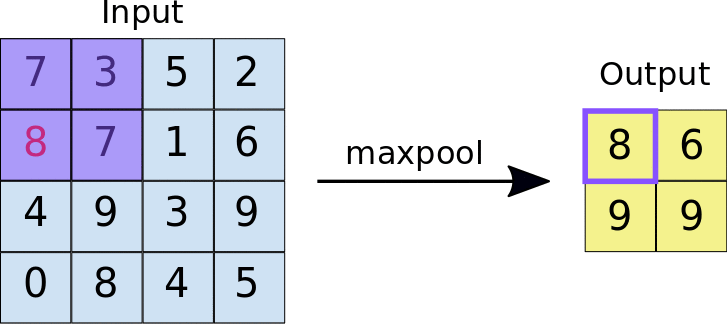

**Dropout**

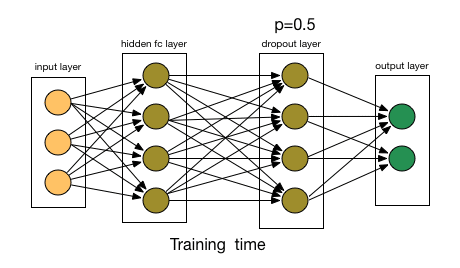

**Flatten**

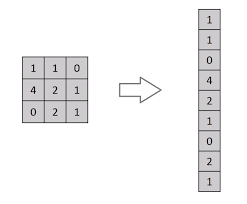

In [8]:
from keras.regularizers import l2 # L2-regularisation
l2_lambda = 0.0001

model = Sequential()

In [9]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3), kernel_regularizer=l2(0.00001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), 1, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(16, (3,3), 1, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(36, activation='softmax'))

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,620 (14.14 MB)

 Trainable params: 3,705,620 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## Обучение
Поставим 15 эпох обучения, добавим валидационные данные

In [12]:
hist = model.fit(train, epochs=15, validation_data=validation)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 343ms/step - accuracy: 0.0294 - loss: 4.3160 - val_accuracy: 0.0655 - val_loss: 3.5691
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.0679 - loss: 3.4331 - val_accuracy: 0.2080 - val_loss: 2.9846
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.1439 - loss: 2.9426 - val_accuracy: 0.2593 - val_loss: 2.6783
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.2707 - loss: 2.5542 - val_accuracy: 0.4900 - val_loss: 2.0705
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.3512 - loss: 2.2307 - val_accuracy: 0.4900 - val_loss: 1.7858
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.4157 - loss: 1.9605 - val_accuracy: 0.7293 - val_loss: 1.2314
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.5104 - loss: 1.6282 - val_accuracy: 0.7521 - val_loss: 0.9904
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - accuracy: 0.5876 - loss: 1.3763 - val_accu

## Кривые обучения
Выведем кривые обучения (Loss и Accuracy)

In [ ]:
# Создаем новый рисунок и оси для графиков с размером 12x6 дюймов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# График для Loss
ax1.plot(hist.history['loss'], color='teal', label='loss')
ax1.plot(hist.history['val_loss'], color='orange', label='val_loss')
ax1.set_title('Loss', fontsize=20)
ax1.legend(loc="upper left")

# График для Accuracy
ax2.plot(hist.history['accuracy'], color='teal', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax2.set_title('Accuracy', fontsize=20)
ax2.legend(loc="upper left")

# Располагаем графики рядом
plt.tight_layout()
plt.show()

In [22]:
def to_one_hot_encoding(array):
    # Находим максимальное значение в каждой строке
    max_values = np.max(array, axis=1, keepdims=True)
    
    # Создаем маску, устанавливая 1 для максимального элемента в каждой строке
    encoded = (array == max_values).astype(float)

    return encoded

Посчитаем метрики Accuracy, Precision и Recall

In [23]:
pre = Precision()
rec = Recall()
acc = Accuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat_prob = model.predict(X)
    yhat = to_one_hot_encoding(yhat_prob)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [25]:
acc.result().numpy(), pre.result().numpy(), rec.result().numpy()

(0.9976788, 0.95821726, 0.95821726)

## Создадим класс-обёртку для нашей модели

In [26]:
class Predictor():
    def __init__(self, model, labels):
        self.model = model
        self.labels = np.array(labels)

    def correct_color(self, image_path):
        # Читаем изображение в формате BGR
        img_bgr = cv2.imread(image_path)

        # Преобразуем изображение из формата BGR в RGB
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        return img_rgb

    def show_image(self, image_path):
        image = self.correct_color(image_path)
        # Отображаем изображение
        plt.imshow(image)
        plt.show()

    def resize(self, image):
        resize = tf.image.resize(image, (256,256))
        return resize
    
    def predict(self, image_path, top=1):
        image = self.resize(self.correct_color(image_path))
        yhat = model.predict(np.expand_dims(image/255, 0))[0]
        top = min(top, len(labels))
        inds_top_labels = np.argpartition(yhat, -top)[-top:]
        probs = yhat[inds_top_labels]
        top_labels = self.labels[inds_top_labels]
        return pd.DataFrame(sorted([(top_labels[i], probs[i]) for i in range(top)], 
                                   key=lambda x: x[1], 
                                   reverse=True),
                           columns=['Название', 'Вероятность'])

    def show_hist(self, image_path, top=1):
        predicted = self.predict(image_path, top)
        predicted = predicted.values
        # Построение гистограммы
        plt.figure(figsize=(len(predicted), 6))
        plt.bar(range(top), [predicted[i][1] for i in range(top)], tick_label=[predicted[i][0] for i in range(top)])
        plt.xlabel('Name')
        plt.ylabel('Probabilities')
        plt.title('Histogram of probabilities')
        plt.xticks(rotation=60)
        plt.show()

In [27]:
predictor = Predictor(model, labels)

In [40]:
path = os.path.join('data', 'test', 'jalepeno', 'Image_5.jpg')
path

'data\\test\\jalepeno\\Image_5.jpg'

In [41]:
predictor.predict(path, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,Название,Вероятность
0,jalepeno,0.999908
1,pomegranate,0.000039
2,watermelon,0.000031


## Сохранение модели

In [42]:
model.save(os.path.join('models','fruits-and-vegetables-classifier.keras'))

In [43]:
new_model = load_model('models\\fruits-and-vegetables-classifier.keras')

In [44]:
predictor = Predictor(new_model, labels)

In [45]:
predictor.predict(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Название,Вероятность
0,jalepeno,0.999908


## Заключение
В данной работе нам удалось построить CNN модель для распознования овощей и фруктов на фотографии. Метрики Accuracy, Precision и Recall